### Importing libraries

In [1]:
import numpy as np
import pandas as pd

In [6]:
# Reading data
df = pd.read_csv(r"data\placement.csv")

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.shape

(100, 4)

#### Steps to perform
1. Preprocess + EDA + Feature Selection
2. Extract input and output cols
3. Scale values
4. Train test split
5. Train the model
6. Evaluate the model/ model selection
7. Deploy the model

In [ ]:
# As you can see there are no null values
# We have only 1 extra column Unnamed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [11]:
df = df.iloc[:,1:]

In [12]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [15]:
import matplotlib.pyplot as plt

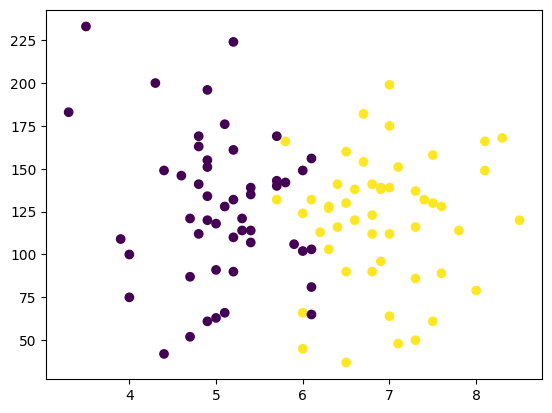

In [20]:
plt.scatter(df["cgpa"],df["iq"],c=df["placement"]) # x axis = cgpa, y axis = iq

We have to make a model which will understand the hidden pattern inside the data and predicts fo the unseen data

#### Logistic Regrassion

A statistical method used for binary classification, predicting the probability of one of two possible outcomes

In [ ]:
# note : X are the features and y is the target value
# X = independent variable
# y = dependent variable
X = df.iloc[:,0:2] #iloc[:(all rows),0:2(column 1 and 2)]
y = df.iloc[:,-1]

In [27]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [25]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [29]:
# splitting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [30]:
X_train

,cgpa,iq
8,6.1,156.0
85,5.8,166.0
31,3.9,109.0
94,4.7,52.0
10,6.0,45.0
...,...,...
99,6.2,113.0
95,4.3,200.0
89,4.9,151.0
49,5.4,135.0


In [33]:
y_train

8     0
85    1
31    0
94    0
10    1
     ..
99    1
95    0
89    0
49    0
6     0
Name: placement, Length: 90, dtype: int64

In [ ]:
# Scaling the data
# many algorithms are sensitive to the scale of input features,
# and scaling can improve their performance and efficiency
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [36]:
X_train

array([[ 8.41087737e-02,  7.69262786e-01],
       [-1.71052675e-01,  1.01244386e+00],
       [-1.78707518e+00, -3.73688245e-01],
       [-1.10664465e+00, -1.75982035e+00],
       [-9.45042401e-04, -1.93004710e+00],
       [ 5.09377854e-01, -1.06189067e-01],
       [-2.56106491e-01,  1.85628217e-01],
       [-9.45042401e-04, -5.43914994e-01],
       [ 7.64539302e-01,  3.55854966e-01],
       [ 3.39270222e-01, -2.03461496e-01],
       [-6.81375571e-01,  2.42289406e+00],
       [-1.10664465e+00, -9.08686600e-01],
       [-8.51483203e-01, -1.49232117e+00],
       [ 1.35991601e+00,  8.83557889e-02],
       [ 8.41087737e-02, -5.19596887e-01],
       [-5.96321755e-01, -8.18709604e-02],
       [ 1.78518509e+00,  1.01244386e+00],
       [ 3.39270222e-01,  4.04491180e-01],
       [-2.56106491e-01,  1.08539818e+00],
       [-7.66429387e-01,  1.25562493e+00],
       [ 1.27486220e+00, -1.54095738e+00],
       [ 6.79485486e-01, -3.32347463e-02],
       [-9.36537019e-01,  1.74198707e+00],
       [-9.

In [ ]:
# We used transform instead of fit_transform 
# because we already know the pattern while scaling X_train
X_test = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# clf : classifier
clf = LogisticRegression() # instantiating a model

In [47]:
# model training
# X_train : features we are using to predict
# y_train : actual correct values, basically target value which we will predict
clf.fit(X_train,y_train)

LogisticRegression()

In [48]:
# Model evaluation
y_pred = clf.predict(X_test)

In [49]:
y_test

46    0
41    0
33    0
63    1
28    0
90    1
27    1
51    0
48    1
78    0
Name: placement, dtype: int64

In [50]:
# Importing library for evaluation
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred)

0.8

In [52]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

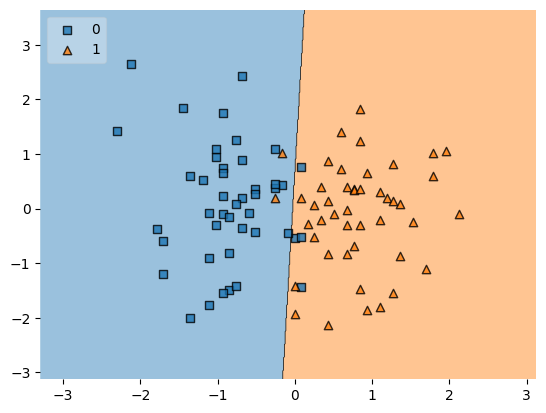

In [54]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

#### Deployment

In python everything is an object pickle picks our model (the object) and convert it into file so that we can integrate it later on in our website


In [55]:
import pickle

In [56]:
# clf : our model name
pickle.dump(clf,open('model.pkl','wb'))